In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/bankloans.csv')

In [ ]:
df.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [ ]:
data = df.copy()

In [ ]:
data = data.drop('address', axis= 1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1150 entries, 0 to 1149
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1150 non-null   int64  
 1   ed        1150 non-null   int64  
 2   employ    1150 non-null   int64  
 3   income    1150 non-null   int64  
 4   debtinc   1150 non-null   float64
 5   creddebt  1150 non-null   float64
 6   othdebt   1150 non-null   float64
 7   default   700 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 72.0 KB


In [ ]:
data.describe()

,age,ed,employ,income,debtinc,creddebt,othdebt,default
count,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,700.000000
mean,35.235652,1.695652,8.781739,47.982609,10.063391,1.605111,3.103844,0.261429
std,8.089961,0.927051,6.914762,40.508814,6.584288,2.135967,3.529273,0.439727
min,20.000000,1.000000,0.000000,13.000000,0.100000,0.011696,0.045584,0.000000
25%,29.000000,1.000000,3.000000,24.000000,5.200000,0.415584,1.047996,0.000000
50%,35.000000,1.000000,7.000000,36.000000,8.750000,0.899130,2.038053,0.000000
75%,41.000000,2.000000,13.000000,56.750000,13.600000,1.898820,3.864960,1.000000
max,56.000000,5.000000,33.000000,446.000000,41.300000,20.561310,35.197500,1.000000


In [ ]:
data.shape

(1150, 8)

In [ ]:
data.isna().sum()

,0
age,0
ed,0
employ,0
income,0
debtinc,0
creddebt,0
othdebt,0
default,450


In [ ]:
data = data.dropna()
data.isna().sum()

,0
age,0
ed,0
employ,0
income,0
debtinc,0
creddebt,0
othdebt,0
default,0


<Axes: >

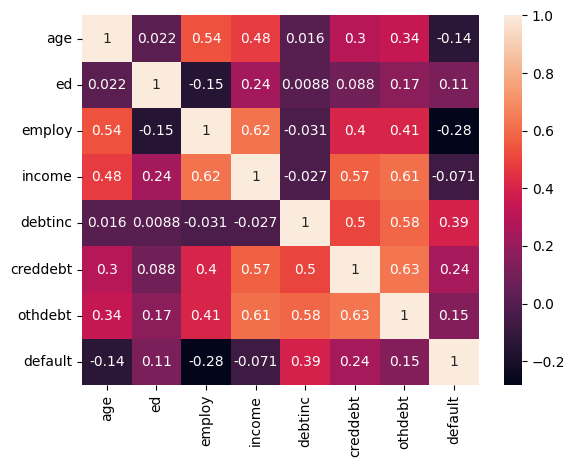

In [ ]:
sns.heatmap(data = data.corr(), annot= True)

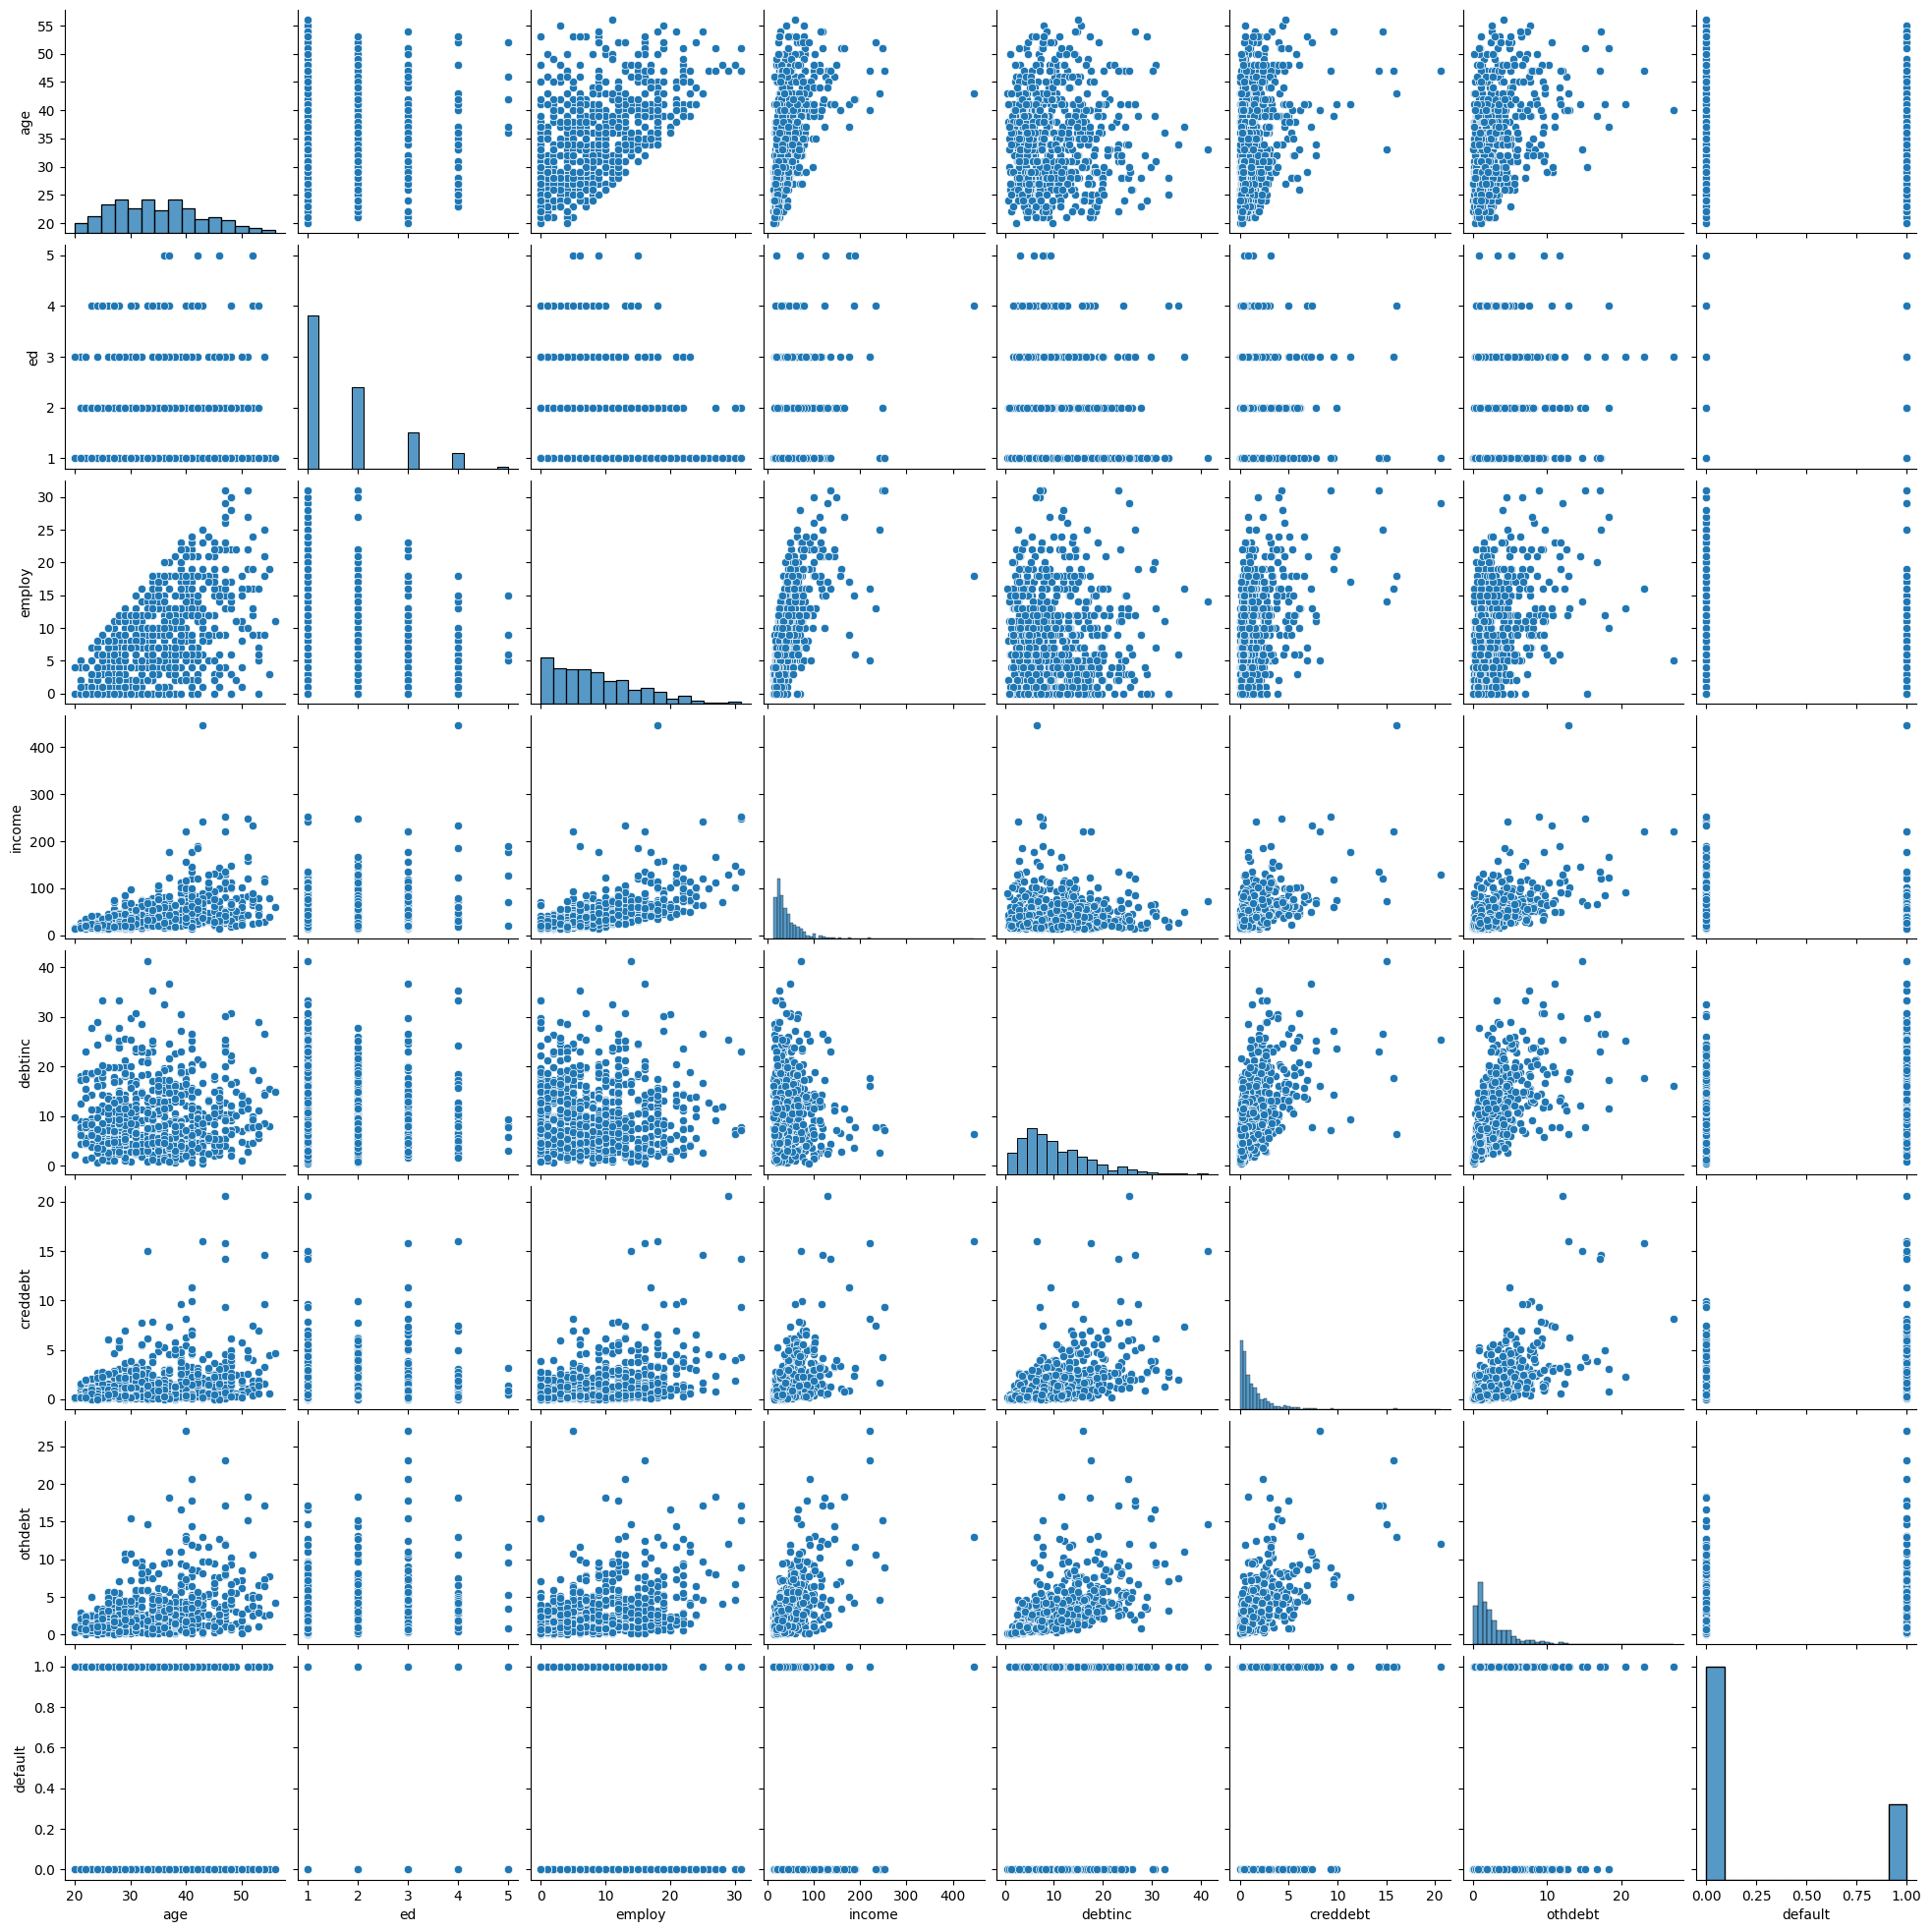

In [ ]:
sns.pairplot(data = data)

In [ ]:
data = data.drop_duplicates()

In [ ]:
data.shape

(700, 8)

In [ ]:
data.default.value_counts()

,count
default,
0.0,517
1.0,183


In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
import numpy as np

In [ ]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

o = data[(data < lower_bound) | (data > upper_bound)]
n_o = data[(data >= lower_bound) & (data <= upper_bound)]

In [51]:
n_o.isna().sum()

,0
age,0
ed,43
employ,10
income,40
debtinc,14
creddebt,55
othdebt,48
default,0


In [52]:
data = n_o.dropna()

In [53]:
data.isna().sum()

,0
age,0
ed,0
employ,0
income,0
debtinc,0
creddebt,0
othdebt,0
default,0


In [54]:
data.shape

(559, 8)

In [55]:
data.default.value_counts()

,count
default,
0.0,425
1.0,134


In [56]:
x = data.drop('default', axis= 1 )
y = data['default']

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from mlxtend.plotting import plot_decision_regions

In [58]:
ro = RandomOverSampler()

In [59]:
xro, yro = ro.fit_resample(x, y)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [60]:
yro.value_counts()

,count
default,
0.0,425
1.0,425


In [61]:
x_train,x_test,y_train,y_test = train_test_split(xro, yro, test_size= 0.2)

In [62]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [64]:
lr.score(x_test, y_test) * 100

67.64705882352942

In [70]:
svm = SVC()
svm.fit(x_train, y_train)

SVC()

In [71]:
svm.score(x_test, y_test) * 100

71.17647058823529

Without using oversampling

In [72]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size= 0.2)

In [73]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [74]:
lr.score(x_test, y_test)

0.7857142857142857

In [76]:
cm = confusion_matrix(y_test, lr.predict(x_test))

<Axes: >

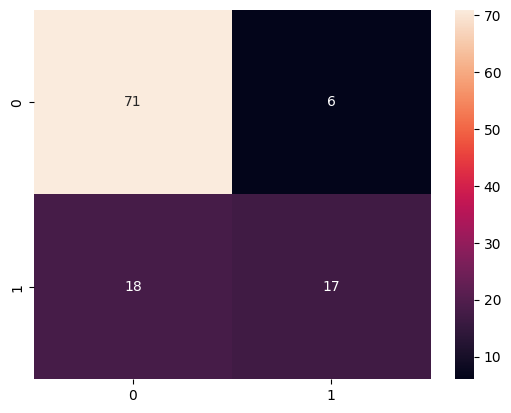

In [79]:
sns.heatmap(data = cm, annot= True)

In [80]:
svc = SVC()
svc.fit(x_train, y_train)


SVC()

In [84]:
svc.score(x_test, y_test)

0.6875